In [3]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
from selenium import webdriver
import time
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import Select
from selenium import webdriver

In [2]:
import time

In [3]:
udf = pd.read_csv('/Users/agorina/Desktop/Final/Userdata_Cleaned.csv')
udf.drop('Unnamed: 0', axis=1, inplace=True)
udf.head()

,Username,Skin_Tone,Skin_Type,Eye_Color,Hair_Color,Rating_Stars,Review,Product_Url
0,allyp3,Medium,Combination,Brown,Brunette,5,This is hands down the best cleanser I’ve ever...,https://www.sephora.com/product/kale-spinach-g...
1,PatTea,Medium,Combination,Brown,Red,1,Unfortunately this doesn’t work for everyone. ...,https://www.sephora.com/product/kale-spinach-g...
2,Sabi1991,No data,No data,No data,No data,5,My favorite cleanser!! i love the packaging on...,https://www.sephora.com/product/kale-spinach-g...
3,happyface2,Fair,Dry,Blue,Blonde,5,I love all things Youth To The People! This cl...,https://www.sephora.com/product/kale-spinach-g...
4,kimkix34,Fair,Normal,Green,Blonde,5,I had a trial size of this and was obsessed. M...,https://www.sephora.com/product/kale-spinach-g...


In [4]:
list_of_products = udf.Product_Url.unique().tolist()

In [353]:
def recommend_by_user_features(skintone, skintype, eyecolor, haircolor, percentile=0.85):
    df = udf[(udf['Skin_Tone'] == skintone) & (udf['Hair_Color'] == haircolor) & (udf['Skin_Type'] == skintype) & (udf['Eye_Color'] == eyecolor)]
    
    recommendations = df[(df['Rating_Stars'].notnull())][['Rating_Stars', 'Product_Url']]
    recommendations = recommendations.sort_values('Rating_Stars', ascending=False).head(250)
    
    print('Based on your features, these are the top products for you:')
    return recommendations

In [360]:
recommend_by_user_features('Medium', 'Combination', 'Brown', 'Brunette').head()['Product_Url'][8584]


Based on your features, these are the top products for you:


'https://www.sephora.com/product/face-buff-energizing-scrub-P12571?icid2=products%20grid:p12571'

# Baseline recommender: group by user features

In [400]:
def recommend_products_by_user_features(skintone, skintype, eyecolor, haircolor, percentile=0.85):
    ddf = df[(df['Skin_Tone'] == skintone) & (df['Hair_Color'] == haircolor) & (df['Skin_Type'] == skintype) & (df['Eye_Color'] == eyecolor)]
    
    recommendations = ddf[(ddf['Rating_Stars'].notnull())][['Rating_Stars', 'Product_Url', 'Product']]
    recommendations = recommendations.sort_values('Rating_Stars', ascending=False).head(250)
    
    print('Based on your features, these are the top products for you:')
    return recommendations

In [402]:
recommend_products_by_user_features('Light', 'Combination', 'Green', 'Brunette').head()

Based on your features, these are the top products for you:


,Rating_Stars,Product_Url,Product
349,5,https://www.sephora.com/product/bi-facil-doubl...,Bi-Facil Double-Action Eye Makeup Remover
1977,5,https://www.sephora.com/product/ultimate-mirac...,Ultimate Miracle Worker Multi-Rejuvenating Cre...
2800,5,https://www.sephora.com/product/aqua-bomb-slee...,Aqua Bomb Sleeping Mask
2918,5,https://www.sephora.com/product/vitamin-c-anti...,Vitamin Nectar Antioxidant Face Mist
2944,5,https://www.sephora.com/product/peat-miracle-r...,Peat Miracle Revital Cream


In [399]:
df.head()

,Username,Skin_Tone,Skin_Type,Eye_Color,Hair_Color,Rating_Stars,Review,Product,Brand,Price,...,Oily,Sensitive,Category,Product_Url,User_id,Product_id,Ingredients_Cleaned,Review_Cleaned,Good_Stuff,Ing_Tfidf
0,allyp3,Medium,Combination,Brown,Brunette,5,This is hands down the best cleanser I’ve ever...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,36,...,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,3420,157,"[sodium, cocoyl, glutamate, cocamidopropyl, be...","[hand, best, cleanser, ever, used, originally,...",1,"sodium, cocoyl, glutamate, cocamidopropyl, bet..."
1,PatTea,Medium,Combination,Brown,Red,1,Unfortunately this doesn’t work for everyone. ...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,36,...,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,2483,157,"[sodium, cocoyl, glutamate, cocamidopropyl, be...","[unfortunately, work, everyone, used, woke, nx...",0,"sodium, cocoyl, glutamate, cocamidopropyl, bet..."
2,Sabi1991,No data,No data,No data,No data,5,My favorite cleanser!! i love the packaging on...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,36,...,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,2715,157,"[sodium, cocoyl, glutamate, cocamidopropyl, be...","[favorite, cleanser, love, packaging, even, th...",1,"sodium, cocoyl, glutamate, cocamidopropyl, bet..."
3,happyface2,Fair,Dry,Blue,Blonde,5,I love all things Youth To The People! This cl...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,36,...,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,4497,157,"[sodium, cocoyl, glutamate, cocamidopropyl, be...","[love, thing, youth, people, cleanser, smell, ...",1,"sodium, cocoyl, glutamate, cocamidopropyl, bet..."
4,kimkix34,Fair,Normal,Green,Blonde,5,I had a trial size of this and was obsessed. M...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,36,...,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,5017,157,"[sodium, cocoyl, glutamate, cocamidopropyl, be...","[trial, size, wa, obsessed, skin, feel, clean,...",1,"sodium, cocoyl, glutamate, cocamidopropyl, bet..."


In [4]:
df.to_csv('/Users/agorina/Desktop/Final/skindataall.csv')


NameError: name 'df' is not defined

In [5]:
df = pd.read_csv('/Users/agorina/Desktop/Final/mergeddata.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,Username,Skin_Tone,Skin_Type,Eye_Color,Hair_Color,Rating_Stars,Review,Product_Url,Urls,Product_Name,...,Brand,Product,Price,Rating,Ingredients,Combination,Dry,Normal,Oily,Sensitive
0,allyp3,Medium,Combination,Brown,Brunette,5,This is hands down the best cleanser I’ve ever...,https://www.sephora.com/product/kale-spinach-g...,https://www.sephora.com/product/kale-spinach-g...,Superfood Antioxidant Cleanser,...,YOUTH TO THE PEOPLE,Superfood Antioxidant Cleanser,36,4.4,"Water, Sodium Cocoyl Glutamate, Cocamidopropyl...",0,0,0,0,0
1,PatTea,Medium,Combination,Brown,Red,1,Unfortunately this doesn’t work for everyone. ...,https://www.sephora.com/product/kale-spinach-g...,https://www.sephora.com/product/kale-spinach-g...,Superfood Antioxidant Cleanser,...,YOUTH TO THE PEOPLE,Superfood Antioxidant Cleanser,36,4.4,"Water, Sodium Cocoyl Glutamate, Cocamidopropyl...",0,0,0,0,0
2,Sabi1991,No data,No data,No data,No data,5,My favorite cleanser!! i love the packaging on...,https://www.sephora.com/product/kale-spinach-g...,https://www.sephora.com/product/kale-spinach-g...,Superfood Antioxidant Cleanser,...,YOUTH TO THE PEOPLE,Superfood Antioxidant Cleanser,36,4.4,"Water, Sodium Cocoyl Glutamate, Cocamidopropyl...",0,0,0,0,0
3,happyface2,Fair,Dry,Blue,Blonde,5,I love all things Youth To The People! This cl...,https://www.sephora.com/product/kale-spinach-g...,https://www.sephora.com/product/kale-spinach-g...,Superfood Antioxidant Cleanser,...,YOUTH TO THE PEOPLE,Superfood Antioxidant Cleanser,36,4.4,"Water, Sodium Cocoyl Glutamate, Cocamidopropyl...",0,0,0,0,0
4,kimkix34,Fair,Normal,Green,Blonde,5,I had a trial size of this and was obsessed. M...,https://www.sephora.com/product/kale-spinach-g...,https://www.sephora.com/product/kale-spinach-g...,Superfood Antioxidant Cleanser,...,YOUTH TO THE PEOPLE,Superfood Antioxidant Cleanser,36,4.4,"Water, Sodium Cocoyl Glutamate, Cocamidopropyl...",0,0,0,0,0


In [6]:
df.drop('Urls', axis=1, inplace=True)
df.drop('Product_Name', axis=1, inplace=True)

In [7]:
df = df[['Username', 'Skin_Tone', 'Skin_Type', 'Eye_Color', 'Hair_Color', 'Rating_Stars', 'Review', 'Product', 'Brand', 'Price', 'Rating', 'Ingredients', 'Combination', 'Dry', 'Normal', 'Oily', 'Sensitive', 'Category', 'Product_Url']]

In [8]:
df.head()

,Username,Skin_Tone,Skin_Type,Eye_Color,Hair_Color,Rating_Stars,Review,Product,Brand,Price,Rating,Ingredients,Combination,Dry,Normal,Oily,Sensitive,Category,Product_Url
0,allyp3,Medium,Combination,Brown,Brunette,5,This is hands down the best cleanser I’ve ever...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,36,4.4,"Water, Sodium Cocoyl Glutamate, Cocamidopropyl...",0,0,0,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...
1,PatTea,Medium,Combination,Brown,Red,1,Unfortunately this doesn’t work for everyone. ...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,36,4.4,"Water, Sodium Cocoyl Glutamate, Cocamidopropyl...",0,0,0,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...
2,Sabi1991,No data,No data,No data,No data,5,My favorite cleanser!! i love the packaging on...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,36,4.4,"Water, Sodium Cocoyl Glutamate, Cocamidopropyl...",0,0,0,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...
3,happyface2,Fair,Dry,Blue,Blonde,5,I love all things Youth To The People! This cl...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,36,4.4,"Water, Sodium Cocoyl Glutamate, Cocamidopropyl...",0,0,0,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...
4,kimkix34,Fair,Normal,Green,Blonde,5,I had a trial size of this and was obsessed. M...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,36,4.4,"Water, Sodium Cocoyl Glutamate, Cocamidopropyl...",0,0,0,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...


In [19]:
df['Product'].nunique()

315

In [20]:
df.to_csv('/Users/agorina/Desktop/Final/merged_cleaned_data.csv')

Text(0.5, 1.0, 'Distribution of User Ratings')

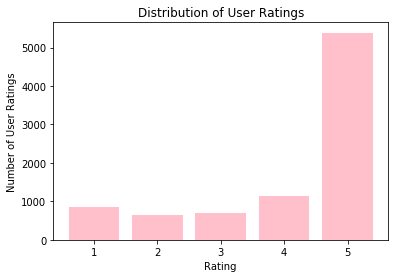

In [21]:
ratings_sorted = sorted(list(zip(df.Rating_Stars.value_counts().index, df.Rating_Stars.value_counts())))
plt.bar([r[0] for r in ratings_sorted], [r[1] for r in ratings_sorted], color='pink')
plt.xlabel("Rating")
plt.ylabel("Number of User Ratings")
plt.title("Distribution of User Ratings")

Text(0.5, 1.0, 'Distribution of Average Ratings')

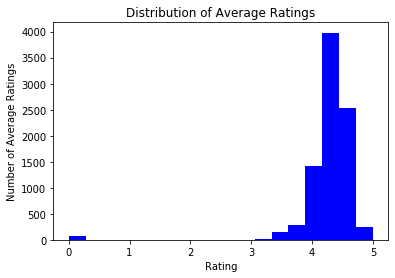

In [28]:

plt.hist(df.Rating, bins=18, color='blue')
plt.xlabel("Rating")
plt.ylabel("Number of Average Ratings")
plt.title("Distribution of Average Ratings")

In [29]:
df.Username.value_counts()

Eye                28
Mitz17             13
irishgrl131         9
Hafah               9
ForestChihuahua     8
                   ..
Kayti9              1
ammac96             1
Hueee               1
Caz325              1
Radkell             1
Name: Username, Length: 6891, dtype: int64

In [11]:
#encoding with unique ids

from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
df['User_id'] = label.fit_transform(df['Username'])
df['Product_id'] = label.fit_transform(df['Product_Url'])
df.head()

,Username,Skin_Tone,Skin_Type,Eye_Color,Hair_Color,Rating_Stars,Review,Product,Brand,Price,...,Ingredients,Combination,Dry,Normal,Oily,Sensitive,Category,Product_Url,User_id,Product_id
0,allyp3,Medium,Combination,Brown,Brunette,5,This is hands down the best cleanser I’ve ever...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,36,...,"Water, Sodium Cocoyl Glutamate, Cocamidopropyl...",0,0,0,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,3420,157
1,PatTea,Medium,Combination,Brown,Red,1,Unfortunately this doesn’t work for everyone. ...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,36,...,"Water, Sodium Cocoyl Glutamate, Cocamidopropyl...",0,0,0,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,2483,157
2,Sabi1991,No data,No data,No data,No data,5,My favorite cleanser!! i love the packaging on...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,36,...,"Water, Sodium Cocoyl Glutamate, Cocamidopropyl...",0,0,0,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,2715,157
3,happyface2,Fair,Dry,Blue,Blonde,5,I love all things Youth To The People! This cl...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,36,...,"Water, Sodium Cocoyl Glutamate, Cocamidopropyl...",0,0,0,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,4497,157
4,kimkix34,Fair,Normal,Green,Blonde,5,I had a trial size of this and was obsessed. M...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,36,...,"Water, Sodium Cocoyl Glutamate, Cocamidopropyl...",0,0,0,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,5017,157


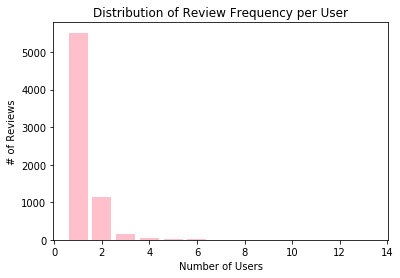

In [32]:
#how many reviews do users write?
from collections import Counter

ratings_per_user = df.User_id.value_counts()
ratings_per_user = sorted(list(zip(ratings_per_user.index, ratings_per_user)))

user_ratings = [r[1] for r in ratings_per_user]
sorted_user_ratings = sorted(Counter(user_ratings).items())
plt.bar([r[0] for r in sorted_user_ratings][:-1], [r[1] for r in sorted_user_ratings][:-1], color='pink')
plt.xlabel("Number of Users")
plt.ylabel("# of Reviews")
plt.title("Distribution of Review Frequency per User")
plt.show()

# Surprise

In [33]:
from surprise import Dataset, Reader
from surprise import SVD
from surprise import accuracy
from surprise.model_selection import cross_validate, train_test_split

In [34]:
data = df[['User_id', 'Product_Url', 'Rating_Stars']]
reader = Reader(line_format='user item rating', sep=',')
data = Dataset.load_from_df(data, reader=reader)

trainset, testset = train_test_split(data, test_size=.2)

In [35]:
svd = SVD()
svd.fit(trainset)

In [36]:
predictions = svd.test(testset)
accuracy.rmse(predictions)
accuracy.mae(predictions)

RMSE: 1.2575
MAE:  1.0047


1.0047368337386986

In [37]:
predictions[:5]

[Prediction(uid=5213, iid='https://www.sephora.com/product/seaberry-moisturizing-face-oil-P374948?icid2=products%20grid:p374948', r_ui=5.0, est=4.361897351937323, details={'was_impossible': False}),
 Prediction(uid=1851, iid='https://www.sephora.com/product/the-method-cleanse-P399740?icid2=products%20grid:p399740', r_ui=5.0, est=4.337997012762235, details={'was_impossible': False}),
 Prediction(uid=2524, iid='https://www.sephora.com/product/max-complexion-correction-pads-P114902?icid2=products%20grid:p114902', r_ui=5.0, est=4.362384203113597, details={'was_impossible': False}),
 Prediction(uid=705, iid='https://www.sephora.com/product/coq-10-toner-P432272?icid2=products%20grid:p432272', r_ui=3.0, est=4.022105359750883, details={'was_impossible': False}),
 Prediction(uid=1789, iid='https://www.sephora.com/product/vitamin-nectar-moisture-glow-face-cream-P420158?icid2=products%20grid:p420158', r_ui=5.0, est=3.936266924207101, details={'was_impossible': False})]

# Interaction matrix and lightfm

In [9]:
def create_interaction_matrix(df, user_col, item_col, rating_col, norm= False, threshold = None):
    interactions = df.groupby([user_col, item_col])[rating_col].sum().unstack().reset_index().fillna(0).set_index(user_col)
    if norm:
        interactions = interactions.applymap(lambda x: 1 if x > threshold else 0)
    return interactions

In [12]:
interaction_matrix = create_interaction_matrix(df=df, user_col='User_id', item_col = 'Product_id', rating_col='Rating_Stars')
interaction_matrix.head()

Product_id,0,1,2,3,4,5,6,7,8,9,...,305,306,307,308,309,310,311,312,313,314
User_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
from scipy import sparse
from lightfm import LightFM
from sklearn.metrics.pairwise import cosine_similarity

/Users/agorina/opt/anaconda3/lib/python3.7/site-packages/lightfm/_lightfm_fast.py:9: UserWarning: LightFM was compiled without OpenMP support. Only a single thread will be used.
  warnings.warn('LightFM was compiled without OpenMP support. '


In [14]:
from lightfm.evaluation import auc_score
from lightfm.evaluation import precision_at_k,recall_at_k

def runMF(interactions, n_components=30, loss='warp', k=15, epoch=30,n_jobs = 4):
    x = sparse.csr_matrix(interactions.values)
    model = LightFM(no_components= n_components, loss=loss,k=k)
    model.fit(x,epochs=epoch,num_threads = n_jobs)
    train_auc = auc_score(model, x, num_threads=n_jobs).mean()
    print('Collaborative filtering AUC: %s' % train_auc)
    print("Train precision: %.4f" % precision_at_k(model, x, k=k,num_threads=n_jobs).mean())

    return model


In [15]:
mf_model = runMF(interactions = interaction_matrix,
                 n_components = 30,
                 loss = 'warp',
                 epoch = 30,
                 n_jobs = 4)

Collaborative filtering AUC: 0.9999994
Train precision: 0.0729


In [16]:
def create_user_dict(interactions):
    user_id = list(interactions.index)
    user_dict = {}
    counter = 0 
    for i in user_id:
        user_dict[i] = counter
        counter += 1
    return user_dict

In [20]:
user_dict = create_user_dict(interaction_matrix)
user_dict

{0: 0,
 1: 1,
 2: 2,
 3: 3,
 4: 4,
 5: 5,
 6: 6,
 7: 7,
 8: 8,
 9: 9,
 10: 10,
 11: 11,
 12: 12,
 13: 13,
 14: 14,
 15: 15,
 16: 16,
 17: 17,
 18: 18,
 19: 19,
 20: 20,
 21: 21,
 22: 22,
 23: 23,
 24: 24,
 25: 25,
 26: 26,
 27: 27,
 28: 28,
 29: 29,
 30: 30,
 31: 31,
 32: 32,
 33: 33,
 34: 34,
 35: 35,
 36: 36,
 37: 37,
 38: 38,
 39: 39,
 40: 40,
 41: 41,
 42: 42,
 43: 43,
 44: 44,
 45: 45,
 46: 46,
 47: 47,
 48: 48,
 49: 49,
 50: 50,
 51: 51,
 52: 52,
 53: 53,
 54: 54,
 55: 55,
 56: 56,
 57: 57,
 58: 58,
 59: 59,
 60: 60,
 61: 61,
 62: 62,
 63: 63,
 64: 64,
 65: 65,
 66: 66,
 67: 67,
 68: 68,
 69: 69,
 70: 70,
 71: 71,
 72: 72,
 73: 73,
 74: 74,
 75: 75,
 76: 76,
 77: 77,
 78: 78,
 79: 79,
 80: 80,
 81: 81,
 82: 82,
 83: 83,
 84: 84,
 85: 85,
 86: 86,
 87: 87,
 88: 88,
 89: 89,
 90: 90,
 91: 91,
 92: 92,
 93: 93,
 94: 94,
 95: 95,
 96: 96,
 97: 97,
 98: 98,
 99: 99,
 100: 100,
 101: 101,
 102: 102,
 103: 103,
 104: 104,
 105: 105,
 106: 106,
 107: 107,
 108: 108,
 109: 109,
 110: 110,

In [18]:
def create_item_dict(df, id_col, name_col):
    item_dict ={}
    for i in range(df.shape[0]):
        item_dict[(df.loc[i,id_col])] = df.loc[i,name_col]
    return item_dict

In [19]:
product_dict = create_item_dict(df = df, id_col = 'Product_id', name_col = 'Product')
product_dict

{157: 'Superfood Antioxidant Cleanser',
 65: 'Cleansing & Exfoliating Wipes',
 210: 'Purity Made Simple Cleanser',
 35: 'Beste™ No. 9 Jelly Cleanser',
 196: 'The Rice Polish Foaming Enzyme Powder',
 229: 'Rose Deep Hydration Facial Toner',
 255: 'Take The Day Off Cleansing Balm',
 36: 'Bi-Facil Double-Action Eye Makeup Remover',
 29: 'Balancing Force™ Oil Control Toner',
 32: 'Beauty Elixir',
 310: 'Waterproof Eye Makeup Remover',
 257: 'Take The Day Off Makeup Remover For Lids, Lashes & Lips',
 117: 'Facial Cotton',
 113: 'ExfoliKate® Cleanser Daily Foaming Wash',
 57: 'Checks and Balances™ Frothy Face Wash',
 52: 'Calendula Herbal Extract Alcohol Free Toner',
 258: 'The Clean Truth™ Foaming Cleanser',
 278: 'Transforming Walnut Scrub',
 144: 'Greek Yoghurt Foaming Cream Cleanser',
 81: 'CoQ-10 Toner',
 48: 'Brightening Cleanser',
 271: 'The True Cream Aqua Bomb',
 268: 'The Moisturizing Soft Cream',
 272: 'The True Cream Moisturizing Bomb',
 79: 'COMPLEXION RESCUE™ Tinted Moisturizer

In [21]:
def sample_recommendation_user(model, interactions, user_id, user_dict, 
                               item_dict, threshold = 0, nrec_items = 10, show = True):
   
    n_users, n_items = interactions.shape
    user_x = user_dict[user_id]
    scores = pd.Series(model.predict(user_x,np.arange(n_items)))
    scores.index = interactions.columns
    scores = list(pd.Series(scores.sort_values(ascending=False).index))
    
    known_items = list(pd.Series(interactions.loc[user_id,:] \
                                 [interactions.loc[user_id,:] > threshold].index).sort_values(ascending=False))
    print(scores)
    scores = [x for x in scores if x not in known_items]
    return_score_list = scores[0:nrec_items]
    print(return_score_list)
    known_items = list(pd.Series(known_items).apply(lambda x: item_dict[x]))
    scores = list(pd.Series(return_score_list).apply(lambda x: item_dict[x]))
    if show == True:
        print("Since you like:")
        counter = 1
        for i in known_items:
            print(str(counter) + '- ' + i)
            counter+=1

        print("\n Recommended Items:")
        counter = 1
        for i in scores:
            print(str(counter) + '- ' + i)
            counter+=1
    return return_score_list

In [23]:
rec_list = sample_recommendation_user(model = mf_model, 
                                      interactions = interaction_matrix, 
                                      user_id = 4792, 
                                      user_dict = user_dict,
                                      item_dict = product_dict, 
                                      threshold = 4,
                                      nrec_items = 10,
                                      show = True)

[89, 182, 79, 197, 152, 107, 20, 39, 166, 162, 265, 267, 70, 295, 61, 71, 284, 214, 228, 310, 28, 209, 106, 126, 179, 188, 192, 42, 97, 130, 268, 9, 111, 261, 116, 37, 1, 185, 110, 103, 36, 277, 304, 239, 189, 51, 236, 105, 301, 213, 314, 222, 155, 16, 118, 60, 240, 109, 313, 63, 137, 292, 92, 181, 174, 93, 21, 128, 135, 191, 151, 104, 291, 142, 289, 238, 219, 100, 66, 77, 255, 74, 194, 119, 312, 207, 145, 153, 249, 287, 64, 220, 215, 203, 157, 170, 50, 150, 218, 8, 124, 161, 167, 195, 276, 273, 143, 296, 73, 217, 244, 303, 198, 274, 154, 47, 272, 83, 156, 212, 206, 115, 159, 33, 147, 205, 149, 45, 139, 52, 53, 311, 40, 148, 108, 134, 113, 101, 25, 266, 245, 173, 305, 122, 196, 229, 231, 201, 127, 178, 163, 146, 243, 14, 76, 233, 72, 17, 91, 204, 175, 3, 141, 30, 300, 23, 294, 282, 190, 226, 26, 138, 160, 56, 227, 121, 4, 183, 80, 88, 129, 58, 285, 85, 49, 54, 200, 248, 290, 81, 253, 48, 210, 186, 96, 216, 0, 286, 12, 171, 263, 262, 199, 164, 211, 302, 98, 225, 38, 10, 221, 308, 256, 1

In [58]:
df.tail()

,Username,Skin_Tone,Skin_Type,Eye_Color,Hair_Color,Rating_Stars,Review,Product,Brand,Price,...,Ingredients,Combination,Dry,Normal,Oily,Sensitive,Category,Product_Url,User_id,Product_id
8698,Tinkfairy,Fair,Combination,Hazel,Brunette,5,I was looking for a overnight serum with retin...,Ferulic + Retinol Wrinkle Recovery Overnight S...,DR. DENNIS GROSS SKINCARE,88,...,"Water, DiCaprylyl Carbonate, Niacinamide, Cety...",1,1,1,1,1,Moisturizer,https://www.sephora.com/product/ferulic-retino...,3127,124
8699,baeyonce,Light,Combination,Blue,Blonde,5,I have never experienced such fast results in ...,Ferulic + Retinol Wrinkle Recovery Overnight S...,DR. DENNIS GROSS SKINCARE,88,...,"Water, DiCaprylyl Carbonate, Niacinamide, Cety...",1,1,1,1,1,Moisturizer,https://www.sephora.com/product/ferulic-retino...,3616,124
8700,JustJC,Dark,Combination,Brown,Black,5,Holy grail product for me! Everyone can tell w...,Ferulic + Retinol Wrinkle Recovery Overnight S...,DR. DENNIS GROSS SKINCARE,88,...,"Water, DiCaprylyl Carbonate, Niacinamide, Cety...",1,1,1,1,1,Moisturizer,https://www.sephora.com/product/ferulic-retino...,1464,124
8701,Latchmi,No data,No data,No data,No data,5,I love this product very much. Very much ! Exp...,Ferulic + Retinol Wrinkle Recovery Overnight S...,DR. DENNIS GROSS SKINCARE,88,...,"Water, DiCaprylyl Carbonate, Niacinamide, Cety...",1,1,1,1,1,Moisturizer,https://www.sephora.com/product/ferulic-retino...,1733,124
8702,xc1148,No data,No data,No data,No data,5,I have tried a million creams and treatments f...,Ferulic + Retinol Wrinkle Recovery Overnight S...,DR. DENNIS GROSS SKINCARE,88,...,"Water, DiCaprylyl Carbonate, Niacinamide, Cety...",1,1,1,1,1,Moisturizer,https://www.sephora.com/product/ferulic-retino...,6824,124


# Tf-Idf for ingredients and reviews

In [64]:
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [99]:
def clean_strings(string):
    #tokenize
    tokenizer = RegexpTokenizer(r'[a-zA-Z]+')
    tokenized_string = tokenizer.tokenize(str(string))
    
    #lower
    lowered_string = [word.lower() for word in tokenized_string]
    
    #lemmatization
    lemmatizer = WordNetLemmatizer() 
    lemmatized_string = [lemmatizer.lemmatize(word) for word in lowered_string]
    
    #filter stop words
    stop_words=set(stopwords.words("english"))
    filtered_string = [word for word in lemmatized_string if word not in stop_words]
   
    #remove custom stop words
    custom_stop_words = ['water', 'aqua', 'eau', 'ingredient', 'list', 'influenster', 'influencer', 'review', 'free', 'product', 'nan']
    cleaned_string = [word for word in filtered_string if word not in custom_stop_words]
    
    return cleaned_string

In [67]:
df['Ingredients_Cleaned'] = df.apply(lambda row: clean_strings(row['Ingredients']), axis=1)

,Username,Skin_Tone,Skin_Type,Eye_Color,Hair_Color,Rating_Stars,Review,Product,Brand,Price,...,Combination,Dry,Normal,Oily,Sensitive,Category,Product_Url,User_id,Product_id,Ingredients_Cleaned
0,allyp3,Medium,Combination,Brown,Brunette,5,This is hands down the best cleanser I’ve ever...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,36,...,0,0,0,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,3420,157,"[sodium, cocoyl, glutamate, cocamidopropyl, be..."
1,PatTea,Medium,Combination,Brown,Red,1,Unfortunately this doesn’t work for everyone. ...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,36,...,0,0,0,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,2483,157,"[sodium, cocoyl, glutamate, cocamidopropyl, be..."
2,Sabi1991,No data,No data,No data,No data,5,My favorite cleanser!! i love the packaging on...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,36,...,0,0,0,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,2715,157,"[sodium, cocoyl, glutamate, cocamidopropyl, be..."
3,happyface2,Fair,Dry,Blue,Blonde,5,I love all things Youth To The People! This cl...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,36,...,0,0,0,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,4497,157,"[sodium, cocoyl, glutamate, cocamidopropyl, be..."
4,kimkix34,Fair,Normal,Green,Blonde,5,I had a trial size of this and was obsessed. M...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,36,...,0,0,0,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,5017,157,"[sodium, cocoyl, glutamate, cocamidopropyl, be..."


In [100]:
df['Review_Cleaned'] = df.apply(lambda row: clean_strings(row['Review']), axis=1)

In [105]:
df.to_csv('/Users/agorina/Desktop/Final/bigdf_cleaner.csv')

In [106]:
from nltk.probability import FreqDist

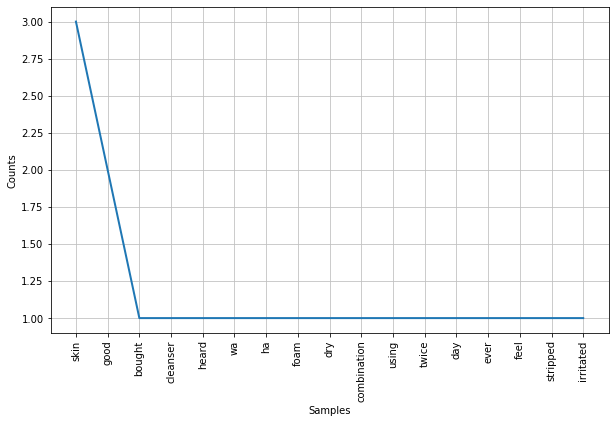

In [112]:
fdist = FreqDist(df['Review_Cleaned'][11])
plt.figure(figsize=(10,6))
fdist.plot(30)

In [268]:
df['Good_Stuff'] = df['Rating_Stars'].apply(lambda x: 1 if x == 5 else 0)
# df[(df['Rating_Stars'] == 5), 1, 0]
# df['superstar'] = np.where(df['actor_1_facebook_likes']>=30000, 1, 0)
df.head()

,Username,Skin_Tone,Skin_Type,Eye_Color,Hair_Color,Rating_Stars,Review,Product,Brand,Price,...,Oily,Sensitive,Category,Product_Url,User_id,Product_id,Ingredients_Cleaned,Review_Cleaned,Good_Stuff,Ing_Tfidf
0,allyp3,Medium,Combination,Brown,Brunette,5,This is hands down the best cleanser I’ve ever...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,36,...,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,3420,157,"[sodium, cocoyl, glutamate, cocamidopropyl, be...","[hand, best, cleanser, ever, used, originally,...",1,"sodium, cocoyl, glutamate, cocamidopropyl, bet..."
1,PatTea,Medium,Combination,Brown,Red,1,Unfortunately this doesn’t work for everyone. ...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,36,...,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,2483,157,"[sodium, cocoyl, glutamate, cocamidopropyl, be...","[unfortunately, work, everyone, used, woke, nx...",0,"sodium, cocoyl, glutamate, cocamidopropyl, bet..."
2,Sabi1991,No data,No data,No data,No data,5,My favorite cleanser!! i love the packaging on...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,36,...,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,2715,157,"[sodium, cocoyl, glutamate, cocamidopropyl, be...","[favorite, cleanser, love, packaging, even, th...",1,"sodium, cocoyl, glutamate, cocamidopropyl, bet..."
3,happyface2,Fair,Dry,Blue,Blonde,5,I love all things Youth To The People! This cl...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,36,...,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,4497,157,"[sodium, cocoyl, glutamate, cocamidopropyl, be...","[love, thing, youth, people, cleanser, smell, ...",1,"sodium, cocoyl, glutamate, cocamidopropyl, bet..."
4,kimkix34,Fair,Normal,Green,Blonde,5,I had a trial size of this and was obsessed. M...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,36,...,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,5017,157,"[sodium, cocoyl, glutamate, cocamidopropyl, be...","[trial, size, wa, obsessed, skin, feel, clean,...",1,"sodium, cocoyl, glutamate, cocamidopropyl, bet..."


In [310]:
df.Rating_Stars

0       5
1       1
2       5
3       5
4       5
       ..
8698    5
8699    5
8700    5
8701    5
8702    5
Name: Rating_Stars, Length: 8649, dtype: int64

In [116]:
df['Good_Stuff'].value_counts()

1    5387
0    3316
Name: Good_Stuff, dtype: int64

# Classifying good stuff (recommended) using review text

In [361]:
df.head()

,Username,Skin_Tone,Skin_Type,Eye_Color,Hair_Color,Rating_Stars,Review,Product,Brand,Price,...,Oily,Sensitive,Category,Product_Url,User_id,Product_id,Ingredients_Cleaned,Review_Cleaned,Good_Stuff,Ing_Tfidf
0,allyp3,Medium,Combination,Brown,Brunette,5,This is hands down the best cleanser I’ve ever...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,36,...,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,3420,157,"[sodium, cocoyl, glutamate, cocamidopropyl, be...","[hand, best, cleanser, ever, used, originally,...",1,"sodium, cocoyl, glutamate, cocamidopropyl, bet..."
1,PatTea,Medium,Combination,Brown,Red,1,Unfortunately this doesn’t work for everyone. ...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,36,...,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,2483,157,"[sodium, cocoyl, glutamate, cocamidopropyl, be...","[unfortunately, work, everyone, used, woke, nx...",0,"sodium, cocoyl, glutamate, cocamidopropyl, bet..."
2,Sabi1991,No data,No data,No data,No data,5,My favorite cleanser!! i love the packaging on...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,36,...,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,2715,157,"[sodium, cocoyl, glutamate, cocamidopropyl, be...","[favorite, cleanser, love, packaging, even, th...",1,"sodium, cocoyl, glutamate, cocamidopropyl, bet..."
3,happyface2,Fair,Dry,Blue,Blonde,5,I love all things Youth To The People! This cl...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,36,...,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,4497,157,"[sodium, cocoyl, glutamate, cocamidopropyl, be...","[love, thing, youth, people, cleanser, smell, ...",1,"sodium, cocoyl, glutamate, cocamidopropyl, bet..."
4,kimkix34,Fair,Normal,Green,Blonde,5,I had a trial size of this and was obsessed. M...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,36,...,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,5017,157,"[sodium, cocoyl, glutamate, cocamidopropyl, be...","[trial, size, wa, obsessed, skin, feel, clean,...",1,"sodium, cocoyl, glutamate, cocamidopropyl, bet..."


In [362]:
from nltk.stem import WordNetLemmatizer 
from sklearn.model_selection import train_test_split as tts

In [363]:
df.dropna(subset = ['Review'], inplace=True)

In [364]:
data_c = df['Review']
target_c = df['Good_Stuff']

In [365]:
import string, re

In [366]:
sw_list = stopwords.words('english')
sw_list += list(string.punctuation)
sw_list += ["''", '""', '...', '``', '’', '“', '’', '”', '‘', '‘', '©',
            '...read', '-', '–', '—', 'nan', 'NaN', ' ', 'skin', 'product', "n't", "'s'"]
sw_set = set(sw_list)

In [367]:
def process_review(review):
    tokens = nltk.word_tokenize(str(review))
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in sw_set]
    return stopwords_removed 

In [368]:
processed_data = list(map(process_review, data_c))

In [369]:
total_vocab = set()
for comment in processed_data:
    total_vocab.update(comment)
len(total_vocab)

10065

In [370]:
lemmatized_output = []
lemmatizer = WordNetLemmatizer() 

for listy in processed_data:
    lemmed = ' '.join([lemmatizer.lemmatize(w) for w in listy])
    lemmatized_output.append(lemmed)

In [371]:
pd.DataFrame(X)

,Review
0,This is hands down the best cleanser I’ve ever...
1,Unfortunately this doesn’t work for everyone. ...
2,My favorite cleanser!! i love the packaging on...
3,I love all things Youth To The People! This cl...
4,I had a trial size of this and was obsessed. M...
...,...
8698,I was looking for a overnight serum with retin...
8699,I have never experienced such fast results in ...
8700,Holy grail product for me! Everyone can tell w...
8701,I love this product very much. Very much ! Exp...


In [372]:
X = data_c

y = target_c

type(X)

pandas.core.series.Series

In [350]:
type(y)

pandas.core.series.Series

In [308]:
np.array(X)

array(['This is hands down the best cleanser I’ve ever used. I originally got it in the mini bottle at checkout on a whim and was shocked by how much it cleared my skin up. I bought the big bottle and haven’t looked back since, now this is the only cleanser I’ll use. I used to get little pimples all over my forehead and ever since I started using this (a year ago) they went away and haven’t returned. While I can’t speak for everyone’s skin, this was a miracle product for clearing my complexion and soothes my facial redness each time I use it. Im in love.\n…read more',
       'Unfortunately this doesn’t work for everyone. I used it once and woke up the nxt day with 5 pimples, used it again, and again, and again but woke up with more and more. Finally i couldn’t take it anymore, I stopped using it, went back to my cerave hydrating cleanser- and Bam! My skin was clearing up every day after that. I suggest getting the small bottle to try it out first. Remember everyone’s skin is very diffe

In [304]:
type(X)

list

In [374]:
X_train, X_test, y_train, y_test = tts(X, y, random_state=42)
tfidf = TfidfVectorizer()

tfidf_data_train = tfidf.fit_transform(X_train)
tfidf_data_test = tfidf.transform(X_test)

tfidf_data_train

<6486x7865 sparse matrix of type '<class 'numpy.float64'>'
	with 261996 stored elements in Compressed Sparse Row format>

In [375]:
non_zero_cols = tfidf_data_train.nnz / float(tfidf_data_train.shape[0])
print("Average Number of Non-Zero Elements in Vectorized Reviews: {}".format(non_zero_cols))

percent_sparse = 1 - (non_zero_cols / float(tfidf_data_train.shape[1]))
print('Percentage of columns containing ZERO: {}'.format(percent_sparse))

Average Number of Non-Zero Elements in Vectorized Reviews: 40.3940795559667
Percentage of columns containing ZERO: 0.9948640712579826


In [377]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0)

In [378]:
rf_classifier.fit(tfidf_data_train, y_train)

rf_test_preds = rf_classifier.predict(tfidf_data_test)

In [380]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB

In [381]:
rf_acc_score = accuracy_score(y_test, rf_test_preds)
rf_f1_score = f1_score(y_test, rf_test_preds)
print('Random Forest with Lemmatization Features')
print("Testing Accuracy: {:.4}".format(rf_acc_score))
print()
print("F1 Score: {:.4}".format(rf_f1_score))

Random Forest with Lemmatization Features
Testing Accuracy: 0.8303

F1 Score: 0.8705


[[ 562  294]
 [  73 1234]]


Text(30.5, 0.5, 'predicted label')

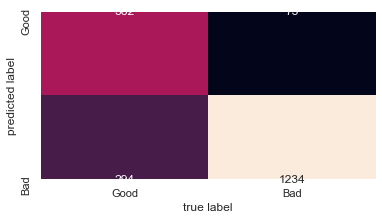

In [386]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


mat = confusion_matrix(y_test, rf_test_preds)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Good', 'Bad'], yticklabels=['Good', 'Bad'])

print(mat)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [174]:
df_freq_good = df[df['Good_Stuff']==1]
df_freq_bad = df[df['Good_Stuff']==0]

In [175]:
data_good = df_freq_good['Review']
data_bad = df_freq_bad['Review']

In [176]:
pros_good = list(map(process_review, data_good))
pros_bad = list(map(process_review, data_bad))

In [177]:
total_vocab_good = set()
for comment in pros_good:
    total_vocab_good.update(comment)
len(total_vocab_good)

7807

In [178]:
total_vocab_bad = set()
for comment in pros_bad:
    total_vocab_bad.update(comment)
len(total_vocab_bad)

6435

In [179]:
flat_good = [item for sublist in pros_good for item in sublist]
flat_bad = [item for sublist in pros_bad for item in sublist]

In [180]:
good_freq = FreqDist(flat_good)
bad_freq = FreqDist(flat_bad)

In [181]:
good_freq.most_common(10)

[('use', 2316),
 ('love', 2215),
 ('face', 1862),
 ('using', 1552),
 ('like', 1213),
 ('makeup', 1208),
 ('dry', 1144),
 ('…read', 1118),
 ('one', 1078),
 ('acne', 1063)]

In [182]:
bad_freq.most_common(10)

[('like', 1276),
 ('face', 1153),
 ('use', 1001),
 ('really', 885),
 ('using', 881),
 ('…read', 682),
 ('would', 663),
 ('used', 634),
 ('dry', 622),
 ("'s", 606)]

In [183]:
good_bar_counts = [x[1] for x in good_freq.most_common(25)]
good_bar_words = [x[0] for x in good_freq.most_common(25)]

bad_bar_counts = [x[1] for x in bad_freq.most_common(25)]
bad_bar_words = [x[0] for x in bad_freq.most_common(25)]

In [184]:
from matplotlib import cm

color = cm.viridis_r(np.linspace(.4,.8, 30))

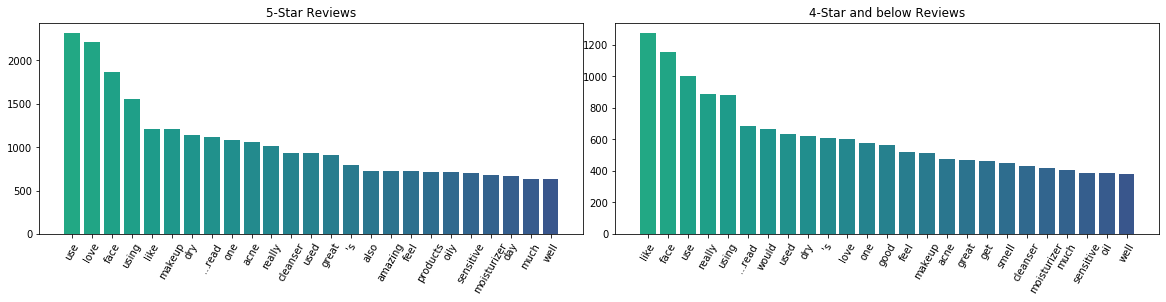

In [185]:
new_figure = plt.figure(figsize=(16,4))

ax = new_figure.add_subplot(121)
ax2 = new_figure.add_subplot(122)

ax.bar(good_bar_words, good_bar_counts, color=color)

ax2.bar(bad_bar_words, bad_bar_counts, color=color )

ax.title.set_text('5-Star Reviews')
ax2.title.set_text('4-Star and below Reviews')

for ax in new_figure.axes:
    plt.sca(ax)
    plt.xticks(rotation=60)

plt.tight_layout(pad=0)

plt.show()

# Extra Modeling

In [391]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

In [388]:
X1 = df.Review
y1 = df.Good_Stuff
X_train1, X_test1, y_train1, y_test1 = tts(X1, y1, random_state = 42)

In [390]:
good_stuff = ['Good', 'Not']

In [392]:
nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train1, y_train1)

y_pred1 = nb.predict(X_test1)

print('accuracy %s' % accuracy_score(y_pred1, y_test1))
print(classification_report(y_test1, y_pred1, target_names=good_stuff))

accuracy 0.7526583448913546
              precision    recall  f1-score   support

        Good       0.96      0.39      0.56       856
         Not       0.71      0.99      0.83      1307

    accuracy                           0.75      2163
   macro avg       0.84      0.69      0.69      2163
weighted avg       0.81      0.75      0.72      2163



In [394]:
sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train1, y_train1)

y_pred2 = sgd.predict(X_test1)

print('accuracy %s' % accuracy_score(y_pred2, y_test1))
print(classification_report(y_test1, y_pred2, target_names=good_stuff))

accuracy 0.841886269070735
              precision    recall  f1-score   support

        Good       0.86      0.72      0.78       856
         Not       0.83      0.92      0.88      1307

    accuracy                           0.84      2163
   macro avg       0.85      0.82      0.83      2163
weighted avg       0.84      0.84      0.84      2163



In [395]:
logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train1, y_train1)


y_pred2 = logreg.predict(X_test1)

print('accuracy %s' % accuracy_score(y_pred1, y_test1))
print(classification_report(y_test1, y_pred2, target_names=good_stuff))

accuracy 0.7526583448913546
              precision    recall  f1-score   support

        Good       0.76      0.79      0.77       856
         Not       0.86      0.83      0.84      1307

    accuracy                           0.81      2163
   macro avg       0.81      0.81      0.81      2163
weighted avg       0.82      0.81      0.82      2163



# Content-based using Ingredients of the product

In [193]:
import ast 
from scipy import stats
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
from surprise import Reader, Dataset, SVD

import warnings; warnings.simplefilter('ignore')

In [209]:
df.head()

,Username,Skin_Tone,Skin_Type,Eye_Color,Hair_Color,Rating_Stars,Review,Product,Brand,Price,...,Oily,Sensitive,Category,Product_Url,User_id,Product_id,Ingredients_Cleaned,Review_Cleaned,Good_Stuff,Ing_Tfidf
0,allyp3,Medium,Combination,Brown,Brunette,5,This is hands down the best cleanser I’ve ever...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,36,...,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,3420,157,"[sodium, cocoyl, glutamate, cocamidopropyl, be...","[hand, best, cleanser, ever, used, originally,...",1,"sodium, cocoyl, glutamate, cocamidopropyl, bet..."
1,PatTea,Medium,Combination,Brown,Red,1,Unfortunately this doesn’t work for everyone. ...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,36,...,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,2483,157,"[sodium, cocoyl, glutamate, cocamidopropyl, be...","[unfortunately, work, everyone, used, woke, nx...",0,"sodium, cocoyl, glutamate, cocamidopropyl, bet..."
2,Sabi1991,No data,No data,No data,No data,5,My favorite cleanser!! i love the packaging on...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,36,...,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,2715,157,"[sodium, cocoyl, glutamate, cocamidopropyl, be...","[favorite, cleanser, love, packaging, even, th...",1,"sodium, cocoyl, glutamate, cocamidopropyl, bet..."
3,happyface2,Fair,Dry,Blue,Blonde,5,I love all things Youth To The People! This cl...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,36,...,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,4497,157,"[sodium, cocoyl, glutamate, cocamidopropyl, be...","[love, thing, youth, people, cleanser, smell, ...",1,"sodium, cocoyl, glutamate, cocamidopropyl, bet..."
4,kimkix34,Fair,Normal,Green,Blonde,5,I had a trial size of this and was obsessed. M...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,36,...,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,5017,157,"[sodium, cocoyl, glutamate, cocamidopropyl, be...","[trial, size, wa, obsessed, skin, feel, clean,...",1,"sodium, cocoyl, glutamate, cocamidopropyl, bet..."


In [206]:
df['Ing_Tfidf'] = [', '.join(map(str, l)) for l in df['Ingredients_Cleaned']]

In [208]:
type(df['Ing_Tfidf'][0])

str

In [211]:
df_cont = df[['Product', 'Product_id', 'Ingredients', 'Product_Url', 'Ing_Tfidf', 'Rating']]
df_cont.drop_duplicates(inplace=True)
df_cont.head()

,Product,Product_id,Ingredients,Product_Url,Ing_Tfidf,Rating
0,Superfood Antioxidant Cleanser,157,"Water, Sodium Cocoyl Glutamate, Cocamidopropyl...",https://www.sephora.com/product/kale-spinach-g...,"sodium, cocoyl, glutamate, cocamidopropyl, bet...",4.4
48,Cleansing & Exfoliating Wipes,65,"Water, Caprylic/Capric Triglyceride, Fragrance...",https://www.sephora.com/product/cleansing-exfo...,"caprylic, capric, triglyceride, fragrance, phe...",4.5
96,Purity Made Simple Cleanser,210,"Water, Sodium Lauroamphoacetate, Sodium Tridec...",https://www.sephora.com/product/purity-made-si...,"sodium, lauroamphoacetate, sodium, trideceth, ...",4.5
144,Beste™ No. 9 Jelly Cleanser,35,"Water, Sodium Lauroyl Methyl Isethionate, Glyc...",https://www.sephora.com/product/beste-no-9-jel...,"sodium, lauroyl, methyl, isethionate, glycerin...",4.1
192,The Rice Polish Foaming Enzyme Powder,196,"Microcrystalline Cellulose, Oryza Sativa (Rice...",https://www.sephora.com/product/polished-rice-...,"microcrystalline, cellulose, oryza, sativa, ri...",4.4


In [212]:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(df_cont['Ingredients'])

In [213]:
tfidf_matrix.shape

(315, 10596)

In [214]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [215]:
print(cosine_sim.shape)
print(cosine_sim[0])

(315, 315)
[1.         0.03602058 0.01675374 0.09608337 0.05047928 0.03097578
 0.00299813 0.01128389 0.08267609 0.03695615 0.         0.00750975
 0.         0.03851044 0.03415404 0.05402673 0.14628683 0.09633823
 0.07119098 0.06947841 0.01171206 0.09294674 0.06475484 0.11178432
 0.03039748 0.05699695 0.06224085 0.11249083 0.02657442 0.02538442
 0.05422726 0.08570219 0.01914349 0.02937219 0.03405837 0.00132821
 0.         0.04044468 0.0392036  0.07771052 0.0902955  0.0147132
 0.01301554 0.09976198 0.         0.01927892 0.0848345  0.03232481
 0.07914593 0.01996403 0.06190516 0.07477934 0.05223716 0.03308626
 0.18260099 0.07625872 0.         0.06336827 0.03899957 0.03473181
 0.02154704 0.05861853 0.03236951 0.05507672 0.0604682  0.04690687
 0.02424114 0.02906312 0.03612583 0.01003099 0.01277175 0.08559589
 0.         0.07947548 0.00525969 0.02223857 0.02097687 0.
 0.09096948 0.01789904 0.01545737 0.06284335 0.01863055 0.13547964
 0.         0.0125871  0.02088004 0.04518491 0.10699261 0.02

In [217]:
df_cont.columns

Index(['Product', 'Product_id', 'Ingredients', 'Product_Url', 'Ing_Tfidf',
       'Rating'],
      dtype='object')

In [218]:
df_cont = df_cont.reset_index(drop=True)
titles = df_cont[['Product', 'Ing_Tfidf', 'Rating']]
indices = pd.Series(df_cont.index, index=df_cont['Product'])
indices.head(5)

Product
Superfood Antioxidant Cleanser           0
Cleansing & Exfoliating Wipes            1
Purity Made Simple Cleanser              2
Beste™ No. 9 Jelly Cleanser              3
The Rice Polish Foaming Enzyme Powder    4
dtype: int64

In [220]:
def content_recommendations(product):
    idx = indices[product]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    product_indices = [i[0] for i in sim_scores]
    return titles.iloc[product_indices]

In [222]:
content_recommendations('The Rice Polish Foaming Enzyme Powder')

,Product,Ing_Tfidf,Rating
38,The Essence Plumping Skin Softener,"saccharomyces, camellia, sinensis, leaf, clado...",4.4
90,Gold Camellia Beauty Oil,"caprylic, capric, triglyceride, ethylhexyl, pa...",4.6
108,Purifying Cleansing Gel,"hydrogenated, starch, hydrolysate, diglycerin,...",4.5
165,Clear Complexion Cleanser,"hydrogenated, starch, hydrolysate, disodium, c...",4.4
43,Luminous Dewy Skin Mist,"glycerin, squalane, olive, origin, cyclopentas...",4.0
115,EradiKate® Daily Cleanser Acne Treatment,"sodium, cocoyl, isethionate, coco, glucoside, ...",4.3
135,Detoxifying Black Charcoal Cleanser,"glycereth, glycerin, sodium, cocoyl, glutamate...",4.3
307,Breakout Fighters,"sodium, cocoyl, isethionate, coco, glucoside, ...",4.0
217,United State™ Balancing Tonic,"lavandula, angustifolia, lavender, flower, ext...",4.3
276,GenOptics Aura Essence Serum,"galactomyces, ferment, filtrate, pitera, niaci...",4.1


# User info SVD

In [311]:
from surprise import Dataset, Reader
from surprise import SVD
from surprise import accuracy
from surprise.model_selection import cross_validate, train_test_split

In [312]:
data = df[['User_id', 'Product_id', 'Rating']]
reader = Reader(line_format='user item rating', sep=',')
data = Dataset.load_from_df(data, reader=reader)

trainset, testset = train_test_split(data, test_size=.2)

In [313]:
svd = SVD()
svd.fit(trainset)

In [314]:
predictions = svd.test(testset)
accuracy.rmse(predictions)
accuracy.mae(predictions)

RMSE: 0.1114
MAE:  0.0661


0.06605093170669936

In [315]:
svd.predict(3420, 157)

Prediction(uid=3420, iid=157, r_ui=None, est=4.3213146413831565, details={'was_impossible': False})

In [316]:
predictions[:5]

[Prediction(uid=4637, iid=281, r_ui=4.2, est=4.208723465969097, details={'was_impossible': False}),
 Prediction(uid=4075, iid=65, r_ui=4.5, est=4.426774382340129, details={'was_impossible': False}),
 Prediction(uid=4709, iid=157, r_ui=4.4, est=4.434153235478147, details={'was_impossible': False}),
 Prediction(uid=4091, iid=121, r_ui=4.1, est=4.188032951290883, details={'was_impossible': False}),
 Prediction(uid=5713, iid=92, r_ui=4.1, est=4.156812595416512, details={'was_impossible': False})]

In [317]:
from surprise.model_selection import RandomizedSearchCV

params = {'n_factors': [1,5,10,25,50,75,100], 'reg_all': [.005,.01,.02,.05,.1,.25,.5], 'lr_all':[.005,.01,.02,.05,.1,.25,.5],
         'n_epochs': [10,20,50]}
model = RandomizedSearchCV(SVD,param_distributions=params,n_jobs=-1,joblib_verbose=10, cv=5)
model.fit(data)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed:    9.6s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed:   10.7s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   11.1s finished


In [318]:
print(model.best_score)
print(model.best_params)

{'rmse': 0.09353706464544843, 'mae': 0.027570086642890436}
{'rmse': {'n_factors': 25, 'reg_all': 0.005, 'lr_all': 0.02, 'n_epochs': 50}, 'mae': {'n_factors': 25, 'reg_all': 0.005, 'lr_all': 0.02, 'n_epochs': 50}}


# Hybrid

In [326]:
df_prod = df[['Product', 'Product_id', 'Price' ,'Ingredients', 'Product_Url', 'Ing_Tfidf', 'Rating']]
df_prod.drop_duplicates(inplace=True)
df_prod.head()

,Product,Product_id,Price,Ingredients,Product_Url,Ing_Tfidf,Rating
0,Superfood Antioxidant Cleanser,157,36,"Water, Sodium Cocoyl Glutamate, Cocamidopropyl...",https://www.sephora.com/product/kale-spinach-g...,"sodium, cocoyl, glutamate, cocamidopropyl, bet...",4.4
48,Cleansing & Exfoliating Wipes,65,7,"Water, Caprylic/Capric Triglyceride, Fragrance...",https://www.sephora.com/product/cleansing-exfo...,"caprylic, capric, triglyceride, fragrance, phe...",4.5
96,Purity Made Simple Cleanser,210,24,"Water, Sodium Lauroamphoacetate, Sodium Tridec...",https://www.sephora.com/product/purity-made-si...,"sodium, lauroamphoacetate, sodium, trideceth, ...",4.5
144,Beste™ No. 9 Jelly Cleanser,35,34,"Water, Sodium Lauroyl Methyl Isethionate, Glyc...",https://www.sephora.com/product/beste-no-9-jel...,"sodium, lauroyl, methyl, isethionate, glycerin...",4.1
192,The Rice Polish Foaming Enzyme Powder,196,65,"Microcrystalline Cellulose, Oryza Sativa (Rice...",https://www.sephora.com/product/polished-rice-...,"microcrystalline, cellulose, oryza, sativa, ri...",4.4


In [327]:
def hybrid_recommender(user_id, product):
    idx = indices[product]
    product_id = df_prod.loc[df_prod.Product==product]['Product_id']
    sim_scores = list(enumerate(cosine_sim[int(idx)]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:26]
    product_indices = [i[0] for i in sim_scores]
    prod = df_prod.iloc[product_indices][['Product', 'Price' ,'Ingredients', 'Product_Url','Rating']]
    prod['est'] = prod.index.map(lambda x: svd.predict(user_id, df_prod.loc[x]['Product_id']).est)
    prod = prod.sort_values('est', ascending=False)
    return prod.head(10)

In [329]:
hybrid_recommender(4091, 'Mega-Mushroom Skin Relief Micellar Cleanser')

,Product,Price,Ingredients,Product_Url,Rating,est
1728,Superberry Hydrate + Glow Oil,44,"Helianthus Annuus (Sunflower) Seed Oil*, Dicap...",https://www.sephora.com/product/superberry-hyd...,4.8,4.666868
3168,Plantscription™ SPF 25 Power Anti-Aging Cream,60,"Avobenzone 3.0%, Homosalate 5.0%, Octisalate 4...",https://www.sephora.com/product/plantscription...,4.7,4.605020
2784,Aqua Bomb Sleeping Mask,34,"Water, Dipropylene Glycol, Polyglycerin-3, 1,2...",https://www.sephora.com/product/aqua-bomb-slee...,4.7,4.603278
1896,Pink Cloud Rosewater Moisture Crème,48,"Water, Aloe Barbadensis (Aloe Vera) Leaf Juice...",https://www.sephora.com/product/pink-cloud-ros...,4.6,4.558143
552,"Take The Day Off Makeup Remover For Lids, Lash...",19,"Water , Isohexadecane , Dimethicone , Cyclopen...",https://www.sephora.com/product/take-the-day-o...,4.6,4.542953
1272,Ceramidin™ Cream,48,"Water, Glycerin, Dipropylene Glycol, Cetearyl ...",https://www.sephora.com/product/ceramidin-tm-c...,4.6,4.530412
3000,Vine[activ] Overnight Detox Oil,50,"Caprylic/Capric Triglyceride, Vitis Vinifera (...",https://www.sephora.com/product/vine-activ-ove...,4.5,4.470380
6096,A Perfect World™ Age-Defense Treatment Lotion ...,25,"Water, Butylene Glycol, Citrus Aurantium Berga...",https://www.sephora.com/product/a-perfect-worl...,4.5,4.443223
1536,100 percent Pure Argan Oil,48,Organic Argania Spinosa (Argan) Kernel Oil*. *...,https://www.sephora.com/product/100-percent-pu...,4.5,4.438979
3336,MakeUp-BreakUp Cool Cleansing Oil,32,"Cetyl Ethylhexanoate, Olea Europaea (Olive) Oi...",https://www.sephora.com/product/makeup-breakup...,4.5,4.437053
